## Crop and Fertilizer Recommendation System using ML 

In [1]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# For modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


In [4]:
# ----------------------------
# 1. Data Loading and Initial Exploration
# ----------------------------
# Loading the dataset
crop = pd.read_csv("dataSet/Crop_recommendation.csv")

In [5]:
# Display first and last few records
print(crop.head())
print(crop.tail())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
        N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee


In [6]:
# Dataset dimensions and information
print(f"Dataset Shape: {crop.shape}")
print(crop.info())

Dataset Shape: (2200, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [7]:
# Check for missing values
print("Missing Values:\n", crop.isnull().sum())

Missing Values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [8]:
# Check for duplicated values
print(f"Duplicated Rows: {crop.duplicated().sum()}")

Duplicated Rows: 0


In [9]:
# Summary statistics
print(crop.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [10]:
# Feature names
print("Columns:", crop.columns.tolist())

Columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


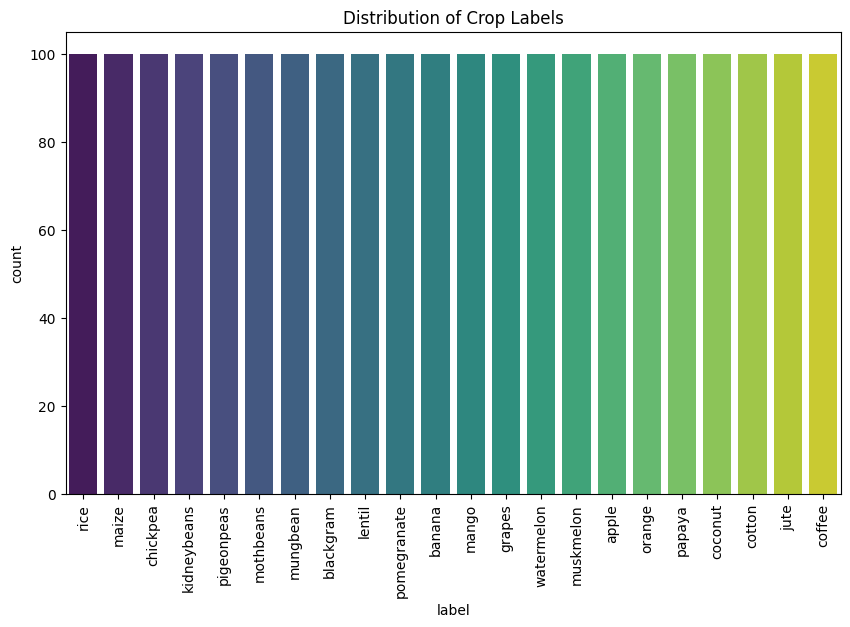

In [11]:
# Target feature distribution
plt.figure(figsize=(10,6))
sns.countplot(x='label', data=crop, palette='viridis')
plt.title('Distribution of Crop Labels')
plt.xticks(rotation=90)
plt.show()

In [12]:
# ----------------------------
# 2. Data Visualization
# ----------------------------
# List of feature columns
features = crop.columns.drop('label').tolist()
print("Feature Columns:", features)

Feature Columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


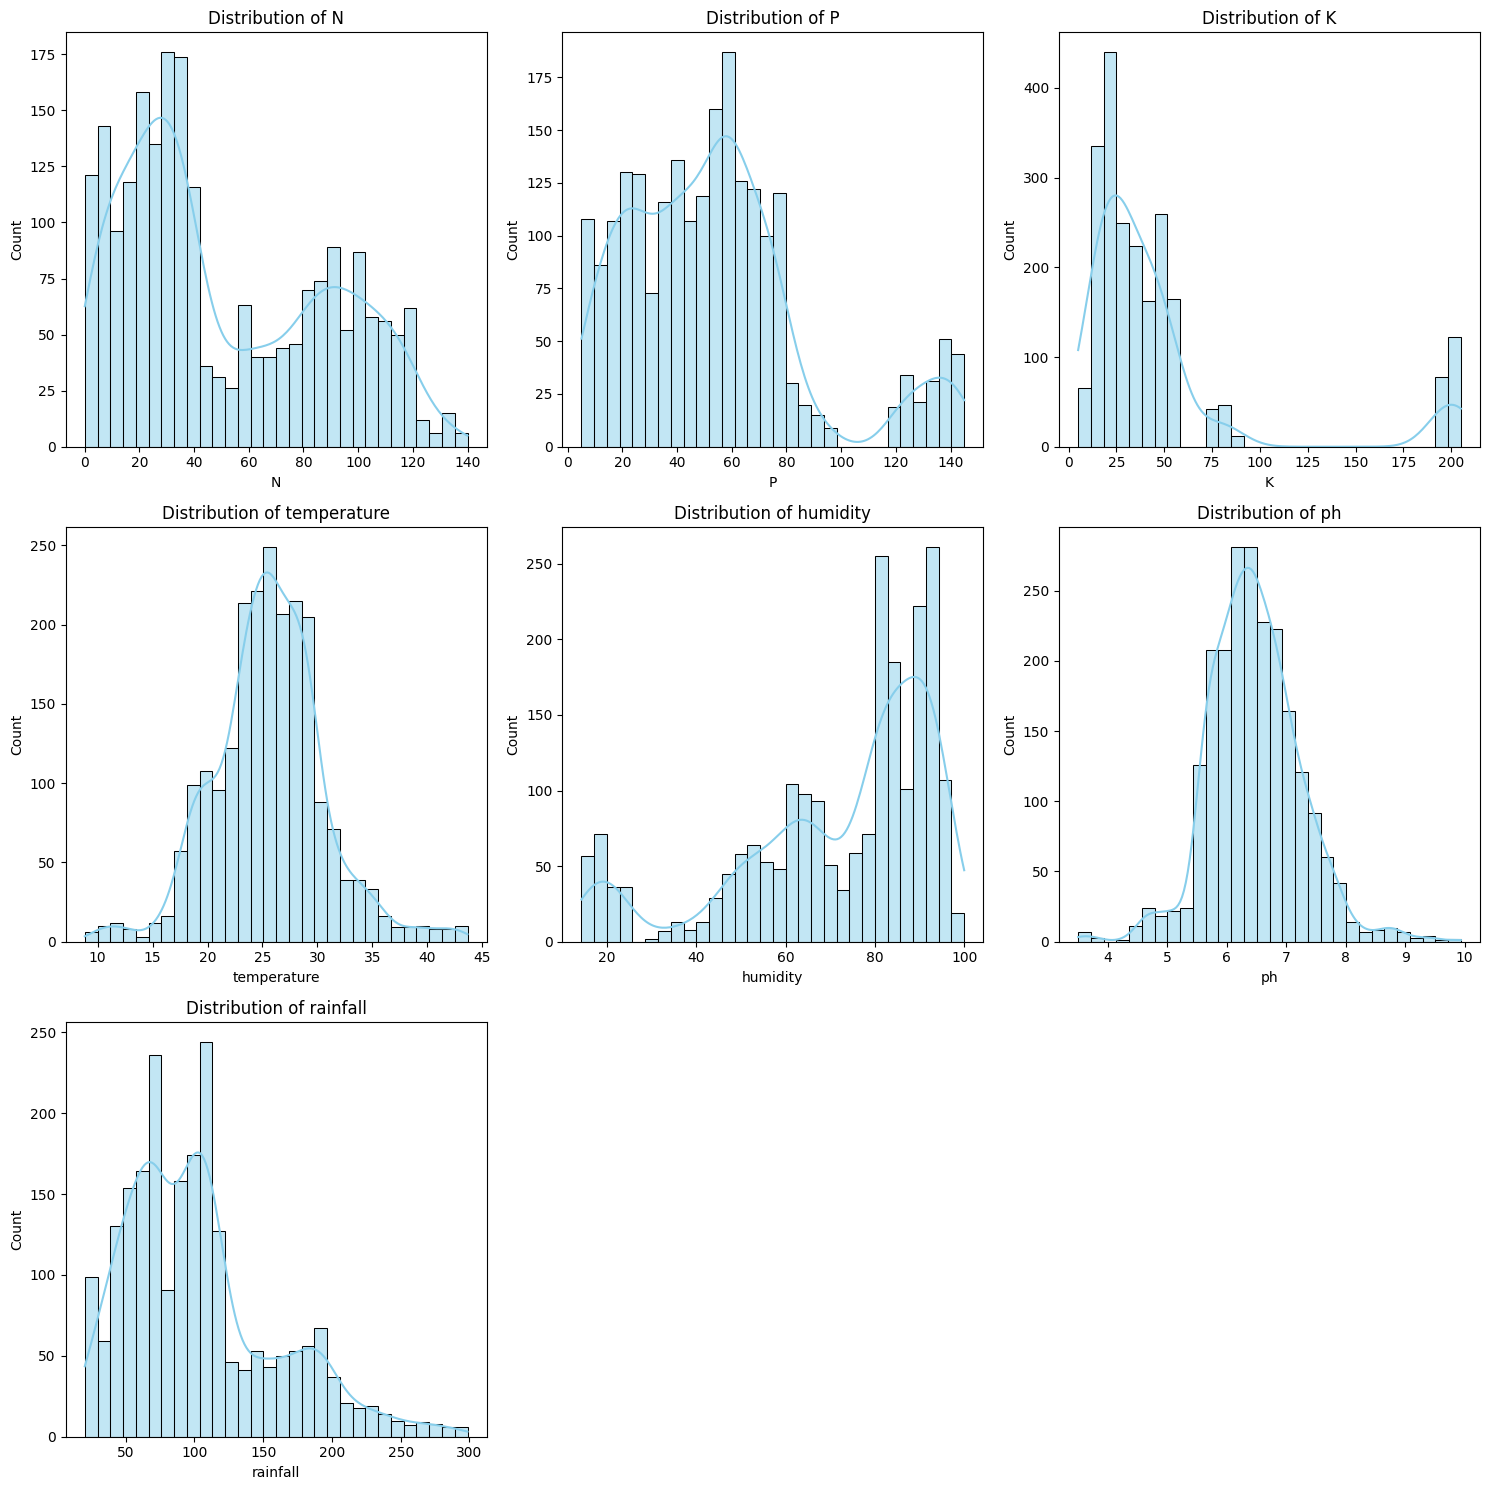

In [13]:
# Histograms with KDE
plt.figure(figsize=(15, 15))
for idx, feature in enumerate(features, 1):
    plt.subplot(3, 3, idx)
    sns.histplot(crop[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

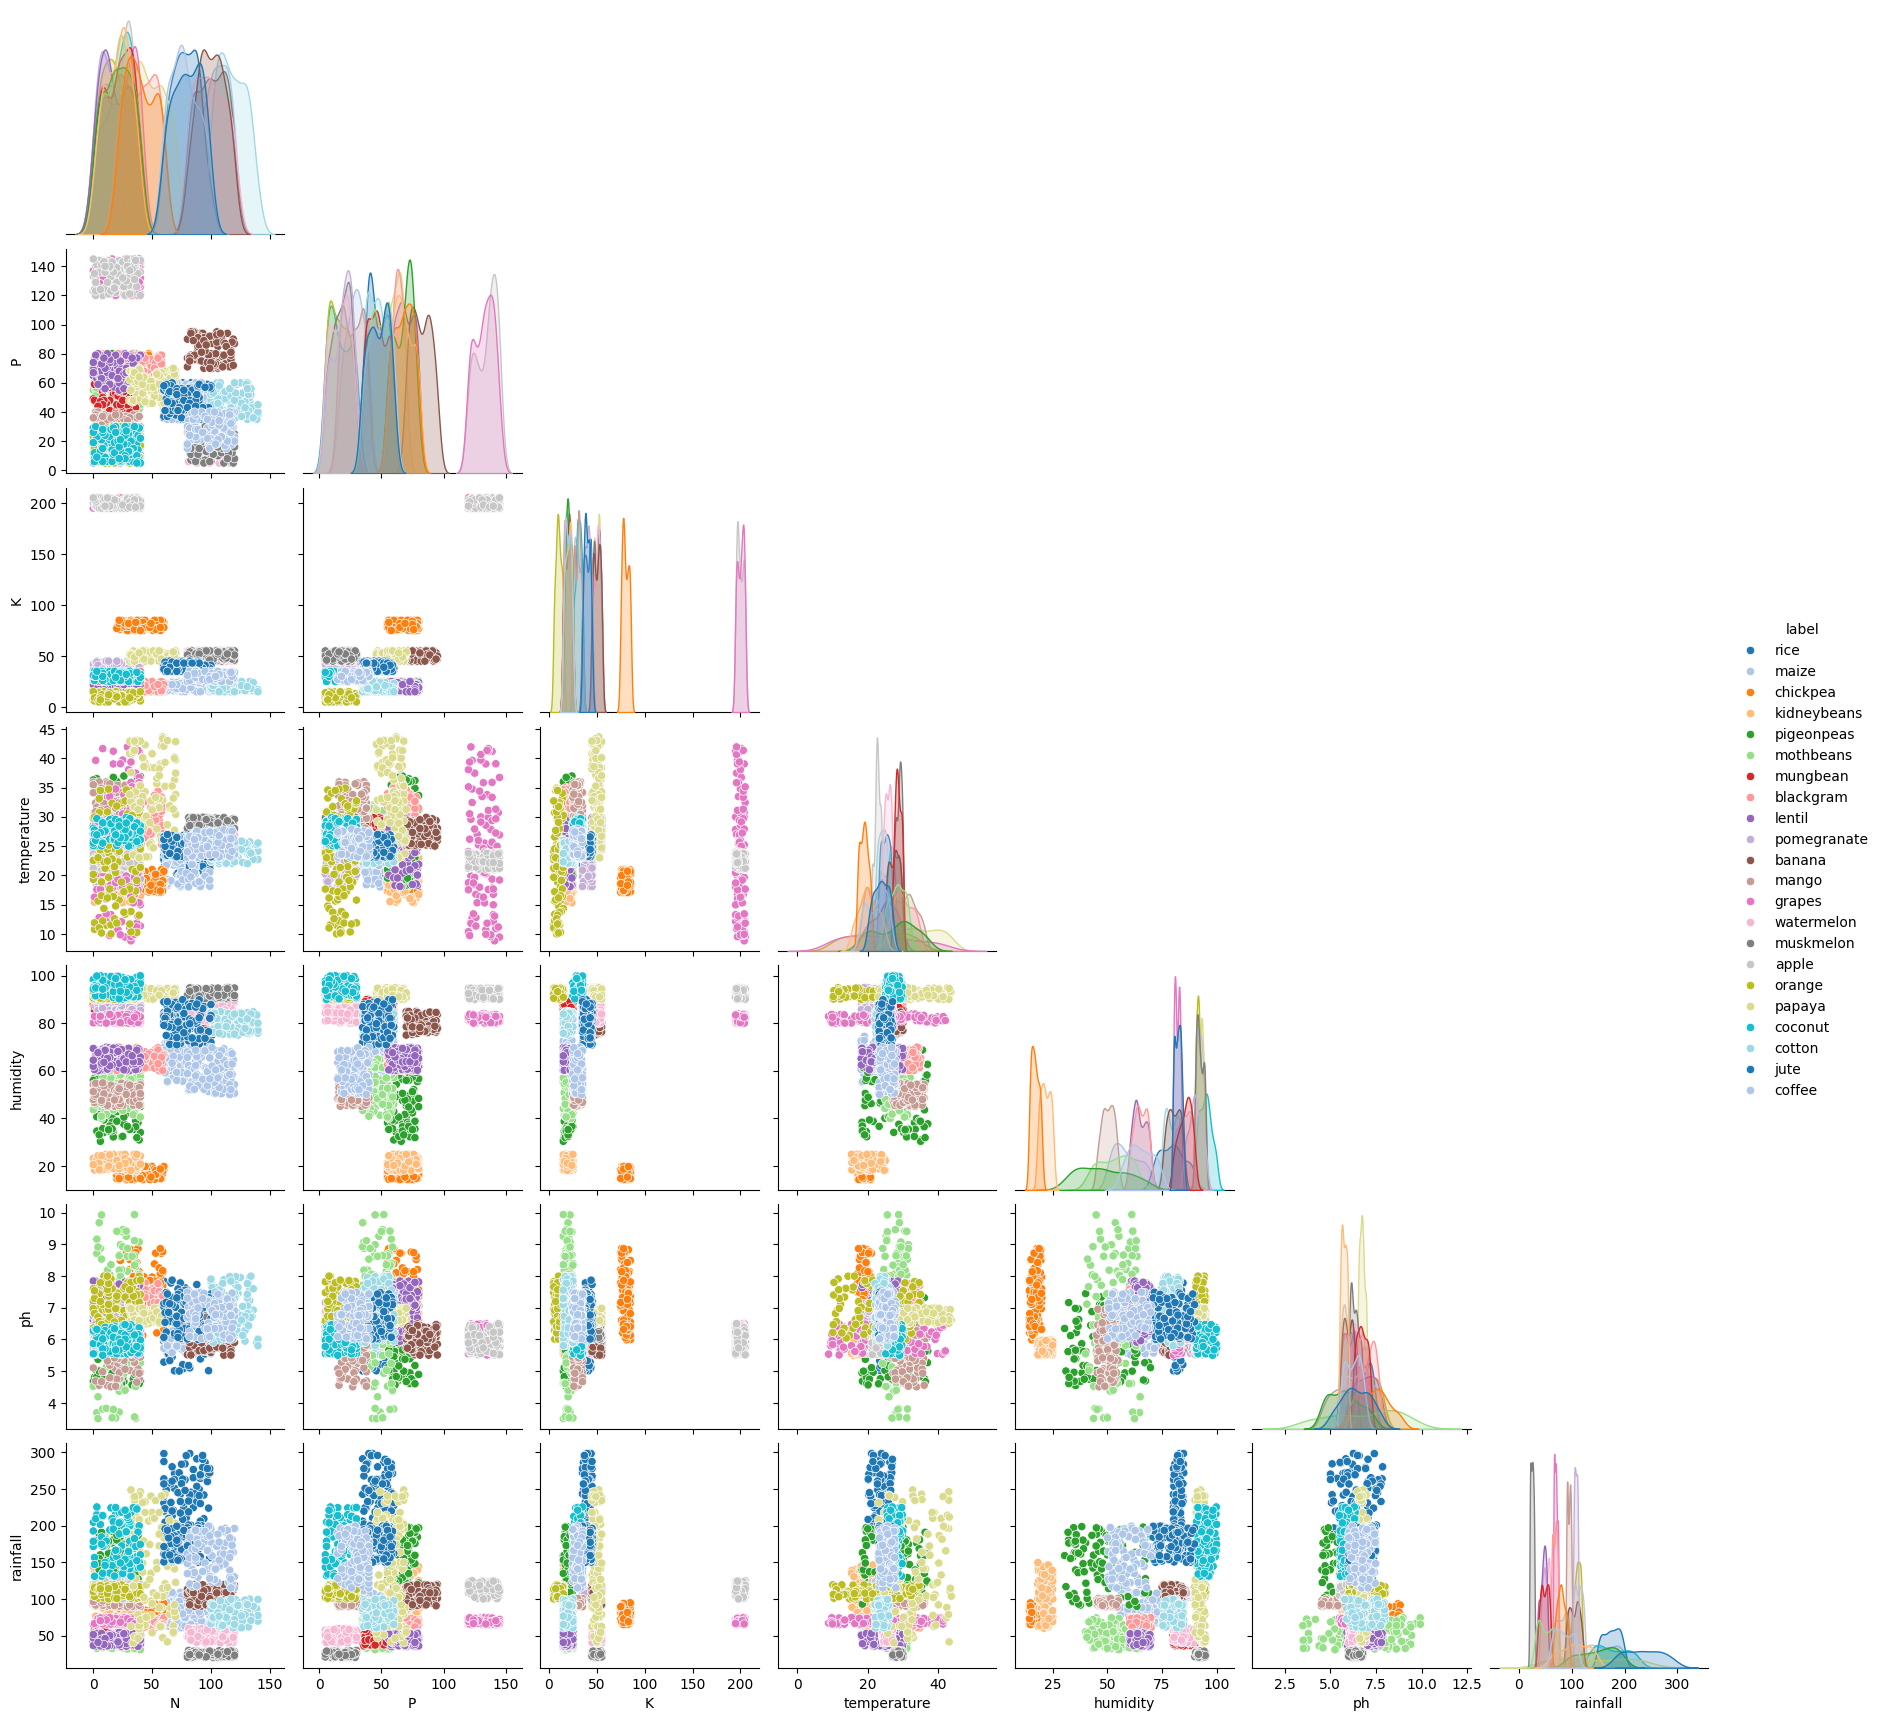

In [14]:
# Pairplot for numerical features colored by label
# Due to high number of classes, this plot might be cluttered
sns.pairplot(crop, hue='label', palette='tab20', diag_kind='kde', corner=True)
plt.show()

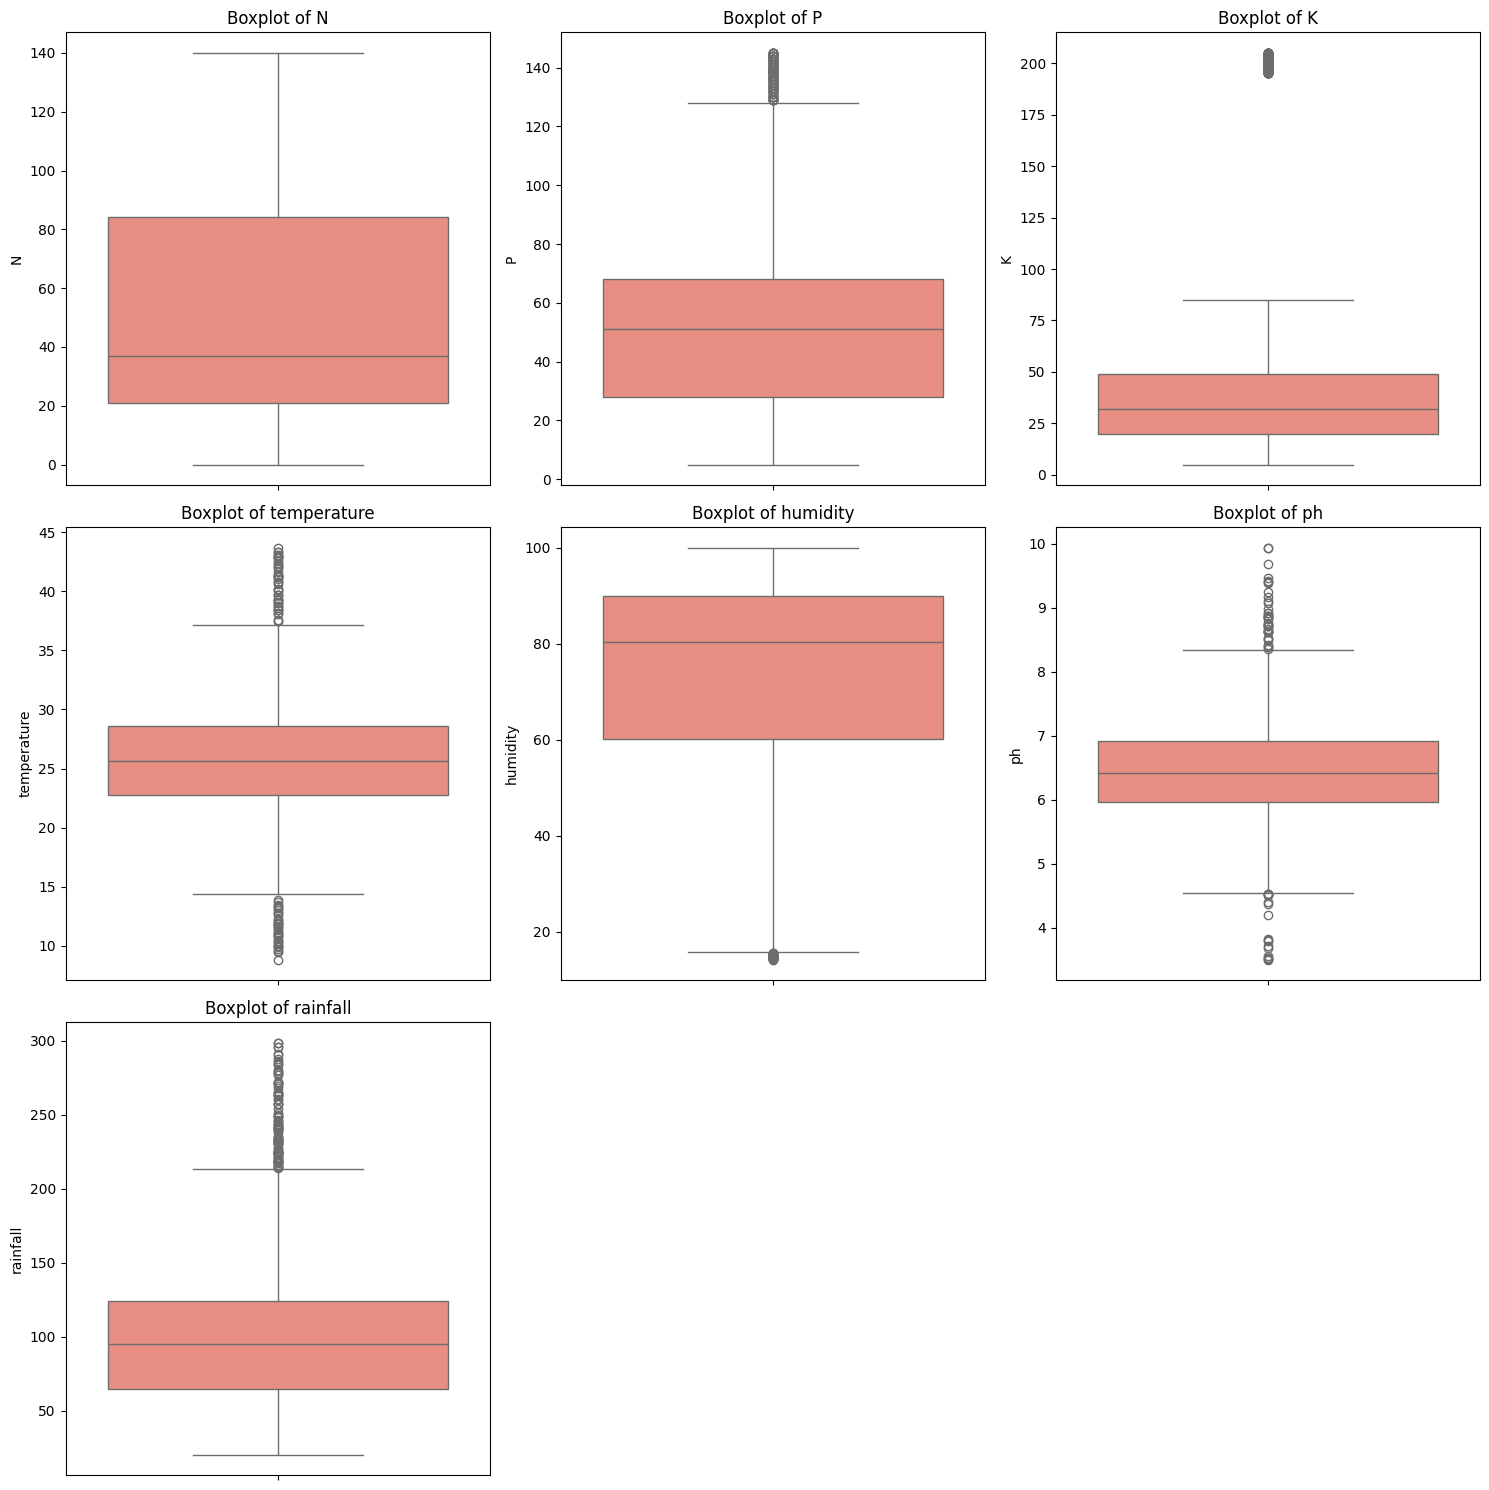

In [15]:
# Boxplots to identify outliers
plt.figure(figsize=(15, 15))
for idx, feature in enumerate(features, 1):
    plt.subplot(3, 3, idx)
    sns.boxplot(y=crop[feature], color='salmon')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

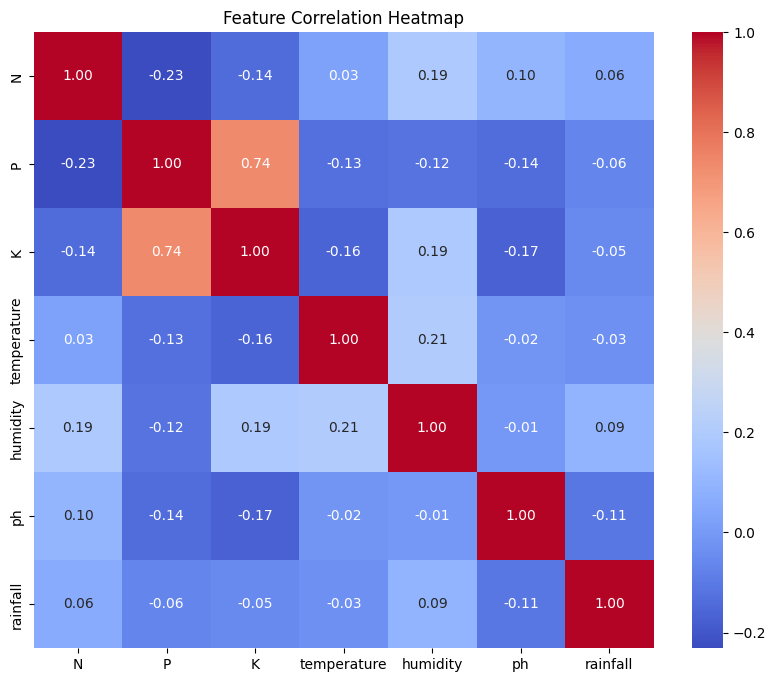

In [16]:
# Correlation heatmap
plt.figure(figsize=(10,8))
corr = crop[features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [17]:
# ----------------------------
# 3. Data Preprocessing
# ----------------------------
# Encoding the target variable
le = LabelEncoder()
crop['crop_no'] = le.fit_transform(crop['label'])
print("Label Encoding Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

Label Encoding Mapping: {'apple': np.int64(0), 'banana': np.int64(1), 'blackgram': np.int64(2), 'chickpea': np.int64(3), 'coconut': np.int64(4), 'coffee': np.int64(5), 'cotton': np.int64(6), 'grapes': np.int64(7), 'jute': np.int64(8), 'kidneybeans': np.int64(9), 'lentil': np.int64(10), 'maize': np.int64(11), 'mango': np.int64(12), 'mothbeans': np.int64(13), 'mungbean': np.int64(14), 'muskmelon': np.int64(15), 'orange': np.int64(16), 'papaya': np.int64(17), 'pigeonpeas': np.int64(18), 'pomegranate': np.int64(19), 'rice': np.int64(20), 'watermelon': np.int64(21)}


In [18]:
# Drop the original label
crop.drop('label', axis=1, inplace=True)

In [19]:
# Define features and target
X = crop.drop('crop_no', axis=1)
y = crop['crop_no']

In [21]:
# Train-Test Split with stratification to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,  stratify=y)
print(f"Training Set Shape: {X_train.shape}")
print(f"Test Set Shape: {X_test.shape}")

Training Set Shape: (1760, 7)
Test Set Shape: (440, 7)


In [22]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
# ----------------------------
# 4. Model Training and Evaluation
# ----------------------------
# Initialize classifiers
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)

In [24]:
# Hyperparameter tuning for Decision Tree
param_grid_dtc = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15]
}

grid_dtc = GridSearchCV(dtc, param_grid_dtc, cv=5, scoring='accuracy', n_jobs=-1)
grid_dtc.fit(X_train_scaled, y_train)
best_dtc = grid_dtc.best_estimator_
print(f"Best Decision Tree Params: {grid_dtc.best_params_}")

Best Decision Tree Params: {'max_depth': None, 'min_samples_split': 5}


In [25]:
# Hyperparameter tuning for Random Forest
param_grid_rfc = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rfc = GridSearchCV(rfc, param_grid_rfc, cv=5, scoring='accuracy', n_jobs=-1)
grid_rfc.fit(X_train_scaled, y_train)
best_rfc = grid_rfc.best_estimator_
print(f"Best Random Forest Params: {grid_rfc.best_params_}")

Best Random Forest Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


In [26]:
# Evaluate Decision Tree
y_pred_dtc = best_dtc.predict(X_test_scaled)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtc))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dtc))

Decision Tree Accuracy: 0.9795454545454545
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.80      0.89        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      0.95      0.95        20
           9       1.00      1.00      1.00        20
          10       0.86      0.90      0.88        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       0.86      0.95      0.90        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20


In [27]:
# Evaluate Random Forest
y_pred_rfc = best_rfc.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rfc))

Random Forest Accuracy: 0.9954545454545455
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20


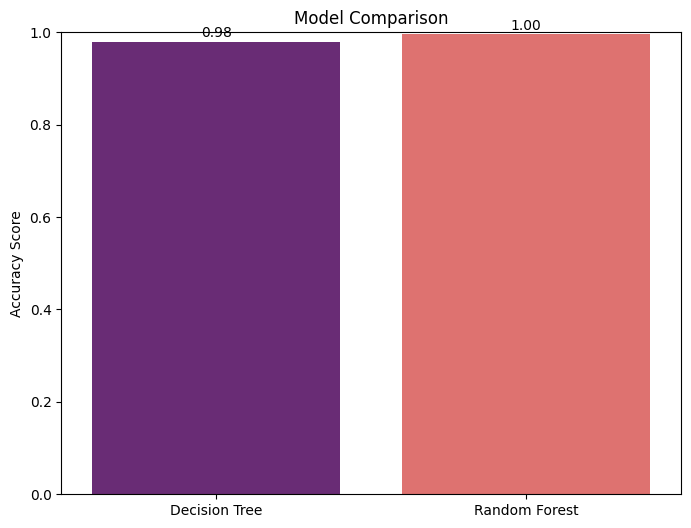

In [28]:
# Compare Models
models = ['Decision Tree', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_dtc), accuracy_score(y_test, y_pred_rfc)]

plt.figure(figsize=(8,6))
sns.barplot(x=models, y=accuracies, palette='magma')
plt.ylim(0,1)
plt.title('Model Comparison')
plt.ylabel('Accuracy Score')
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')
plt.show()

In [30]:
# ----------------------------
# 5. Improved Prediction Function
# ----------------------------
def crop_rec(N, P, K, temp, hum, ph, rain, model=best_rfc):
    """
    Recommend the best crop to grow based on input parameters.

    Parameters:
    N, P, K: Nutrient levels
    temp: Temperature
    hum: Humidity
    ph: pH value
    rain: Rainfall
    model: Trained machine learning model

    Returns:
    Recommended crop name.
    """
    input_features = np.array([[N, P, K, temp, hum, ph, rain]])
    scaled_features = scaler.transform(input_features)
    prediction = model.predict(scaled_features)[0]
    crop_name = le.inverse_transform([prediction])[0]
    return f"The best crop to grow is: {crop_name}"

In [31]:
# ----------------------------
# 6. Example Prediction
# ----------------------------
# Sample input values
N = 45
P = 55
K = 55
temp = 26
hum = 83
ph = 8.1
rain = 186

print(crop_rec(N, P, K, temp, hum, ph, rain))

The best crop to grow is: papaya
